In [35]:
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [2]:
df = pd.read_csv("Car_Dataset.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.shape

(301, 9)

In [6]:
for column in df.columns:
    if(df[column].dtype=='object'):
        print("Column Name : \t", column)
        print(df[column].value_counts())
        print('-'*30)

Column Name : 	 Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Royal Enfield Bullet 350     1
Mahindra Mojo XT300          1
Suzuki Access 125            1
alto 800                     1
Yamaha FZ S                  1
Name: Car_Name, Length: 98, dtype: int64
------------------------------
Column Name : 	 Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
------------------------------
Column Name : 	 Seller_Type
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
------------------------------
Column Name : 	 Transmission
Manual       261
Automatic     40
Name: Transmission, dtype: int64
------------------------------


In [7]:
df.drop('Car_Name',axis = 1,inplace = True)

In [8]:
df.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
# creating a new variable for no. of years for which car is used   
df['used_years'] = datetime.datetime.now().year - df['Year']

In [10]:
df.drop('Year',axis=1,inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,used_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [11]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,used_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

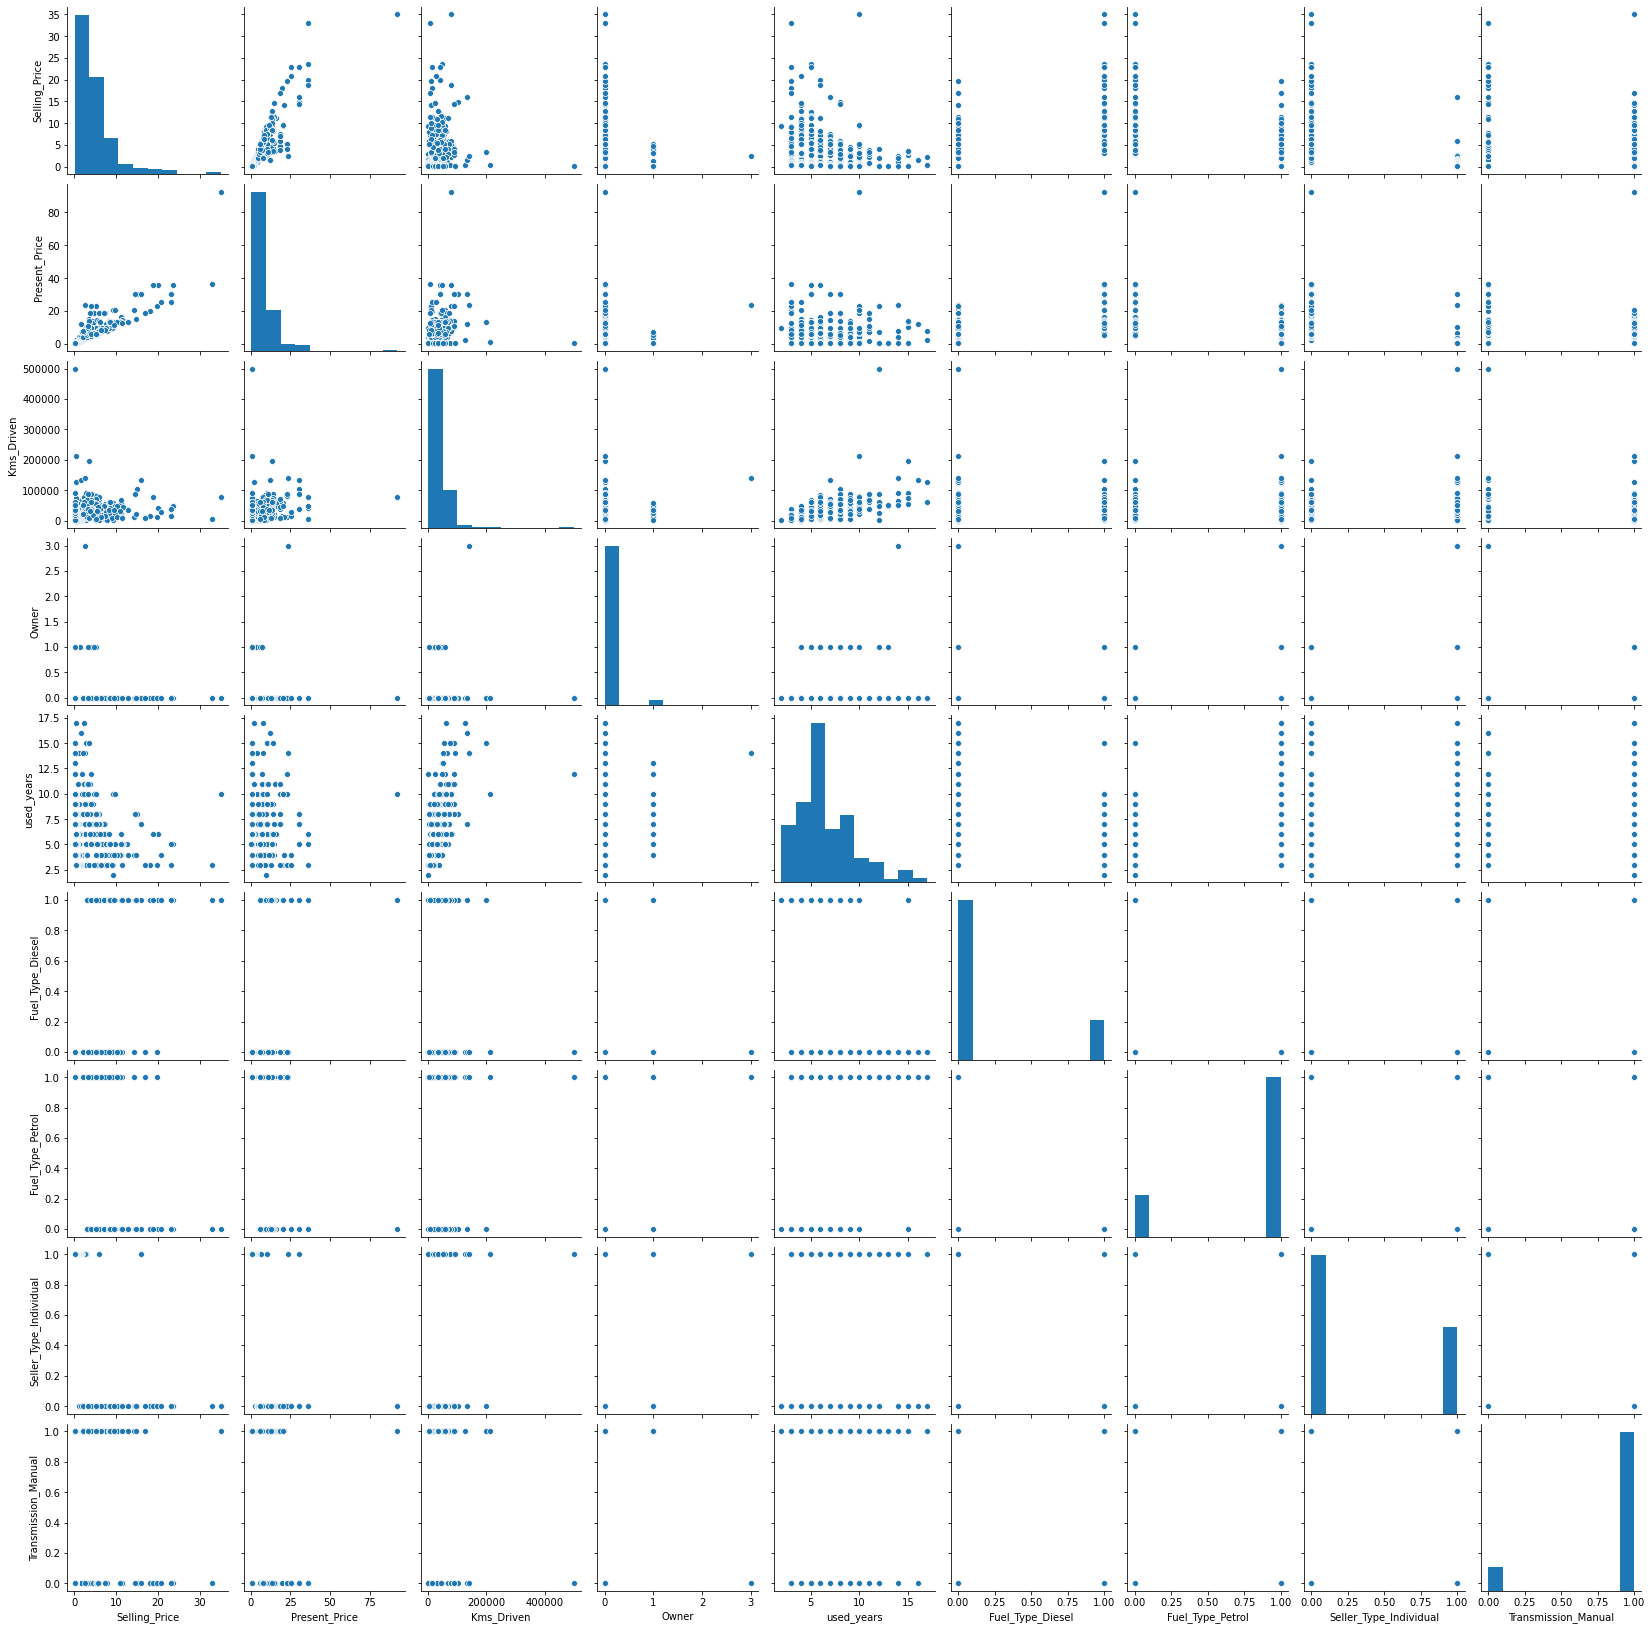

In [14]:
#checking corelation
sns.pairplot(df)

In [ ]:
sns.heatmap()

In [15]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [16]:
X.head()

,Present_Price,Kms_Driven,Owner,used_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [17]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(240, 8)
(240,)
(61, 8)
(61,)


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [25]:
regressor = RandomForestRegressor()

In [26]:
#setting up the hyperparameters

#Number of trees to be generated
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num = 12)]

#No. of features to consider when looking for the best split
max_features = ['auto', 'sqrt']

#max depth of the tree
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]

#minimum number of samples required to split an internal node
min_samples_split = [2,5,8,10,15,20]

#minimum no. of samples required to be at leaf node
min_samples_leaf = [1,2,5,10]

In [28]:
#creating the random grid

random_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [29]:
rf_random = RandomizedSearchCV(estimator = regressor,
                               param_distributions = random_grid,
                               scoring = 'neg_mean_squared_error', 
                               n_iter=10,
                               cv = 5,
                               verbose = 2,
                               random_state = 42,
                               n_jobs = 1)

In [30]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.5s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.4s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.4s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=900, min_samples_split=20, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=20, min_samples_leaf=10, max_features=auto, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=20, min

[CV]  n_estimators=1100, min_samples_split=8, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=1100, min_samples_split=8, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=8, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=1100, min_samples_split=8, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=8, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=1100, min_samples_split=8, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=8, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=1100, min_samples_split=8, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=8, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=300, min_samples_split=5, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 8, 10, 15,
                                                              20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [31]:
# let's check the best set of hyperparameters
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [32]:
rf_random.best_score_

-3.8879276228612305

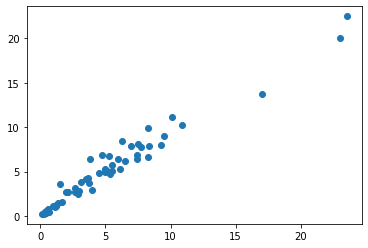

In [33]:
predictions=rf_random.predict(X_test)
plt.scatter(y_test,predictions)

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6409905026060759
MSE: 0.9944851747421114
RMSE: 0.9972387751898295


In [37]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [40]:
!freeze requirement.txt

'freeze' is not recognized as an internal or external command,
operable program or batch file.
